### Data and Feature Visualization

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from FeatureCatcher import FeatureCatcher
from playerpredictMLP import MultiPredModelMLP, KFold_cross_validation
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.utils.data as Data

In [17]:
#split input and label
def split_input(df):
    return df.iloc[:-1]

def split_label(df):
    return df.iloc[-1]

def get_input_label(df):
    df_xtrain = df.groupby('block_id').apply(lambda x: split_input(x))
    df_label = df.groupby('block_id').apply(lambda x: split_label(x))
    df_xtrain.reset_index(drop=True, inplace=True)
    df_xtrain.reset_index(drop=True, inplace=True)
    return df_xtrain, df_label

def split_train_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

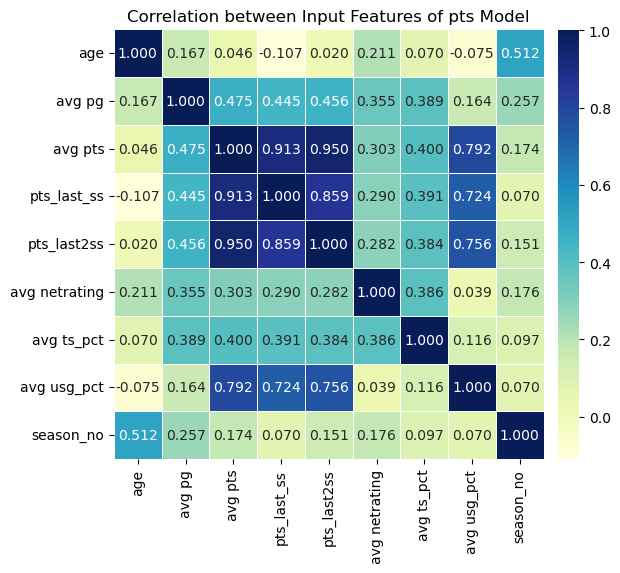

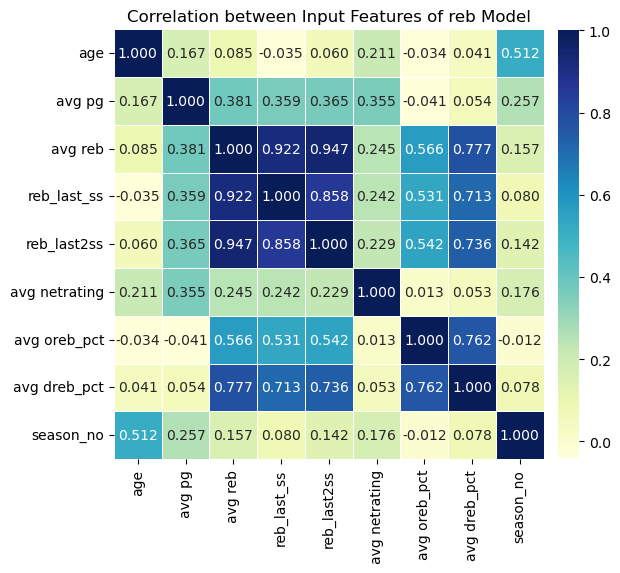

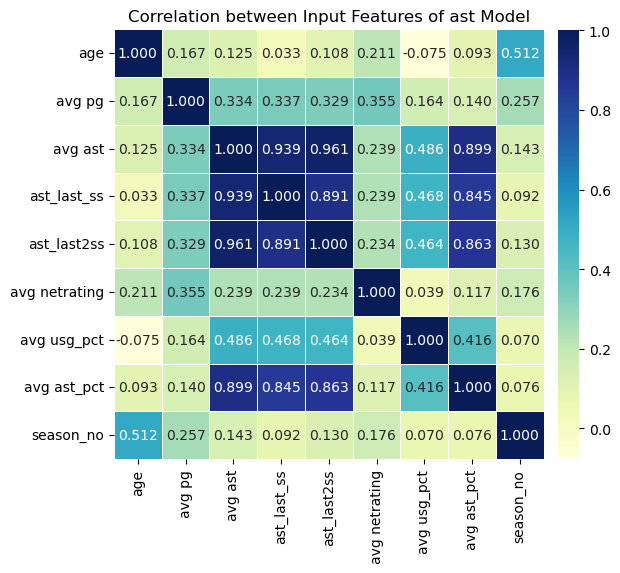

In [29]:
#load data
df_data = pd.read_csv('data/trainset.csv')
df_xtrain, df_label = get_input_label(df_data)

#get features
fc = FeatureCatcher(df_xtrain=df_xtrain, df_label=df_label)
feature_pts, feature_reb, feature_ast, label_pts, label_reb, label_ast = fc.get_feature_labels()



#corelation visualization of pts model input features
datacor = np.corrcoef(feature_pts, rowvar=0)
feature_list = ['age', 'avg pg', 'avg pts', 'pts_last_ss', 'pts_last2ss', 'avg netrating',
                'avg ts_pct', 'avg usg_pct', 'season_no']
datacor = pd.DataFrame(data=datacor, columns=feature_list , index=feature_list)
plt.figure(figsize=(6,6))
ax = sns.heatmap(datacor, square = True, annot = True, fmt = '.3f',
                 linewidths = .5, cmap = 'YlGnBu',
                 cbar_kws = {'fraction': 0.046, 'pad': 0.03})
plt.title('Correlation between Input Features of pts Model')
plt.savefig("c1.png",dpi=300,bbox_inches = 'tight')
plt.show()

#corelation visualization of reb model input features
datacor = np.corrcoef(feature_reb, rowvar=0)
feature_list = ['age', 'avg pg', 'avg reb', 'reb_last_ss', 'reb_last2ss', 'avg netrating',
                'avg oreb_pct', 'avg dreb_pct', 'season_no']
datacor = pd.DataFrame(data=datacor, columns=feature_list , index=feature_list)
plt.figure(figsize=(6,6))
ax = sns.heatmap(datacor, square = True, annot = True, fmt = '.3f',
                 linewidths = .5, cmap = 'YlGnBu',
                 cbar_kws = {'fraction': 0.046, 'pad': 0.03})
plt.title('Correlation between Input Features of reb Model')
plt.savefig("c2.png",dpi=300,bbox_inches = 'tight')
plt.show()


#corelation visualization of ast model input features
datacor = np.corrcoef(feature_ast, rowvar=0)
feature_list = ['age', 'avg pg', 'avg ast', 'ast_last_ss', 'ast_last2ss', 'avg netrating',
                'avg usg_pct', 'avg ast_pct', 'season_no']
datacor = pd.DataFrame(data=datacor, columns=feature_list , index=feature_list)
plt.figure(figsize=(6,6))
ax = sns.heatmap(datacor, square = True, annot = True, fmt = '.3f',
                 linewidths = .5, cmap = 'YlGnBu',
                 cbar_kws = {'fraction': 0.046, 'pad': 0.03})
plt.title('Correlation between Input Features of ast Model')
plt.savefig("c3.png",dpi=300,bbox_inches = 'tight')
plt.show()

# MLP

### Model and Parameter Selection 

lr selection

In [32]:
#load data
df_data = pd.read_csv('data/trainset.csv')
df_xtrain, df_label = get_input_label(df_data)

#get features
fc = FeatureCatcher(df_xtrain=df_xtrain, df_label=df_label)
feature_pts, feature_reb, feature_ast, label_pts, label_reb, label_ast = fc.get_feature_labels()


x_pts_train, x_pts_test, y_pts_train, y_pts_test = split_train_test(feature_pts, label_pts)
x_reb_train, x_reb_test, y_reb_train, y_reb_test = split_train_test(feature_reb, label_reb)
x_ast_train, x_ast_test, y_ast_train, y_ast_test = split_train_test(feature_ast, label_ast)

#standerization
scaler = StandardScaler()
scaler.fit(x_pts_train)
x_pts_train, x_pts_test = scaler.transform(x_pts_train), scaler.transform(x_pts_test)
scaler = StandardScaler()
scaler.fit(x_reb_train)
x_reb_train, x_reb_test = scaler.transform(x_reb_train), scaler.transform(x_reb_test)
scaler = StandardScaler()
scaler.fit(x_ast_train)
x_ast_train, x_ast_test = scaler.transform(x_ast_train), scaler.transform(x_ast_test)

#cross validation on lr
# mse_loss_val = KFold_cross_validation(x_pts_train, y_pts_train, x_reb_train, y_reb_train, x_ast_train, y_ast_train)

cross validation mean:
[[       nan 1.28211923 0.84144315]
 [2.99945024 1.20867943 0.80222948]
 [3.24978648 1.21620375 0.88594186]
 [3.48429946 2.05017016 1.5555204 ]]
cross validation std:
[[       nan 0.10243668 0.09762798]
 [0.33309615 0.13800677 0.09098482]
 [0.91114496 0.15966551 0.19297897]
 [1.38273953 0.7175804  0.4746864 ]]


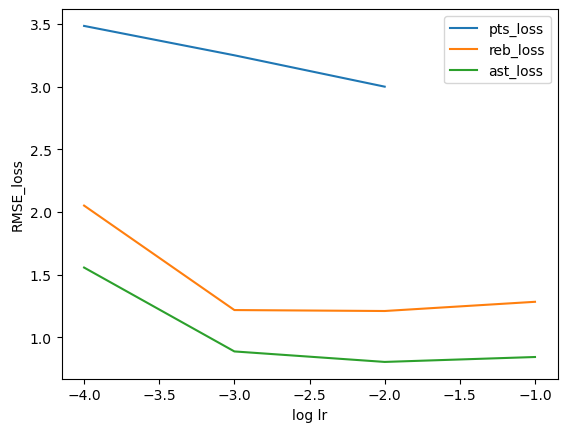

In [4]:
mse_loss_val = np.array(mse_loss_val)
print('cross validation mean:')
print(np.mean(mse_loss_val, axis=1))
print('cross validation std:')
print(np.std(mse_loss_val, axis=1))

mmse_loss_val = np.mean(mse_loss_val, axis=1)
pts_loss = mmse_loss_val[:,0]
reb_loss = mmse_loss_val[:,1]
ast_loss = mmse_loss_val[:,2]

# x = np.arange(4)
x = np.log10(np.array([0.1, 1e-2, 1e-3, 1e-4]))
plt.plot(x, pts_loss, label='pts_loss')
plt.plot(x, reb_loss, label='reb_loss')
plt.plot(x, ast_loss, label='ast_loss')
plt.ylabel('RMSE_loss')
plt.xlabel('log lr')
plt.legend()
plt.savefig("lr.png",dpi=300,bbox_inches = 'tight')
plt.show()

reg value selection

In [33]:
#cross validation on reg_val
mse_loss_val = KFold_cross_validation(x_pts_train, y_pts_train, x_reb_train, y_reb_train, x_ast_train, y_ast_train)

=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:112.88488089769406
epoch:10,MSE loss:8.856976975175671
epoch:20,MSE loss:8.119933712751346
epoch:30,MSE loss:7.919559693874273
epoch:40,MSE loss:7.8311538803846314
start train reb model
epoch:0,MSE loss:22.764613101356908
epoch:10,MSE loss:2.596413019904517
epoch:20,MSE loss:1.7403477264526195
epoch:30,MSE loss:1.580169075413754
epoch:40,MSE loss:1.5284998403455978
start train ast model
epoch:0,MSE loss:7.08807238958832
epoch:10,MSE loss:3.9300811873342756
epoch:20,MSE loss:1.797174180360665
epoch:30,MSE loss:0.9160774668356529
epoch:40,MSE loss:0.8274027360113043
test pts rmse:3.215405889627563, test reb rmse:1.4304378901740282, test ast rmse:0.8522617723743482
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:112.05707564389795
epoch:10,MSE loss:8.985425518867665
epoch:20,MSE loss:8.328009246883536
epoch:30,MSE loss:8.110919500652113
epoch:40,M

epoch:40,MSE loss:7.947196673629875
start train reb model
epoch:0,MSE loss:17.749033289744442
epoch:10,MSE loss:3.485099071846869
epoch:20,MSE loss:1.7663880443214475
epoch:30,MSE loss:1.6095923790358062
epoch:40,MSE loss:1.5480852691750777
start train ast model
epoch:0,MSE loss:9.195175590371727
epoch:10,MSE loss:1.0888893586352355
epoch:20,MSE loss:0.8855120884744745
epoch:30,MSE loss:0.8345633745193481
epoch:40,MSE loss:0.793565241017736
test pts rmse:3.067964910571202, test reb rmse:1.1172801083224437, test ast rmse:0.8565917535344265
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:119.30914903224858
epoch:10,MSE loss:9.25152321865684
epoch:20,MSE loss:8.227071511118035
epoch:30,MSE loss:8.038014609114567
epoch:40,MSE loss:7.958290017637095
start train reb model
epoch:0,MSE loss:18.1580939400465
epoch:10,MSE loss:2.0246682211868743
epoch:20,MSE loss:1.771096194597115
epoch:30,MSE loss:1.6859340640835296
epoch:40,MSE loss:1.63230023617

start train ast model
epoch:0,MSE loss:5.236922611867575
epoch:10,MSE loss:0.9203539620664783
epoch:20,MSE loss:0.8367242158803725
epoch:30,MSE loss:0.7947490779977096
epoch:40,MSE loss:0.7673311681675732
test pts rmse:3.1644165271585005, test reb rmse:1.0977187960656074, test ast rmse:0.8626863221102549
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:112.11196644144847
epoch:10,MSE loss:8.486307975941134
epoch:20,MSE loss:8.029699608795624
epoch:30,MSE loss:7.883771588031511
epoch:40,MSE loss:7.8255970603541325
start train reb model
epoch:0,MSE loss:24.040093486470386
epoch:10,MSE loss:7.040295041593394
epoch:20,MSE loss:2.0947549952600237
epoch:30,MSE loss:1.8337296977975315
epoch:40,MSE loss:1.6752668879085915
start train ast model
epoch:0,MSE loss:6.552250975056698
epoch:10,MSE loss:1.1423605429498773
epoch:20,MSE loss:0.8368299029823533
epoch:30,MSE loss:0.7909760977092543
epoch:40,MSE loss:0.7614180817639917
test pts rmse:2.97417414

epoch:10,MSE loss:8.464569866209102
epoch:20,MSE loss:8.01029926672914
epoch:30,MSE loss:7.866961285583955
epoch:40,MSE loss:7.786345080325478
start train reb model
epoch:0,MSE loss:21.26159247061364
epoch:10,MSE loss:2.110088494487275
epoch:20,MSE loss:1.7073468521125335
epoch:30,MSE loss:1.5549905434586948
epoch:40,MSE loss:1.5026557830939615
start train ast model
epoch:0,MSE loss:9.345323766980853
epoch:10,MSE loss:4.953363045713956
epoch:20,MSE loss:2.844848374675091
epoch:30,MSE loss:0.9275298593635846
epoch:40,MSE loss:0.790906276021685
test pts rmse:3.3354029656338127, test reb rmse:1.370459677396251, test ast rmse:0.8960405824989851
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:104.08626011439732
epoch:10,MSE loss:9.062481693755416
epoch:20,MSE loss:8.285874402612672
epoch:30,MSE loss:7.990030948380778
epoch:40,MSE loss:7.850079185084293
start train reb model
epoch:0,MSE loss:18.746726588199014
epoch:10,MSE loss:2.31542100852593

epoch:30,MSE loss:1.800132079232008
epoch:40,MSE loss:1.7038658552600028
start train ast model
epoch:0,MSE loss:8.32664846836176
epoch:10,MSE loss:1.0578470548292749
epoch:20,MSE loss:0.8478815519720092
epoch:30,MSE loss:0.7798978695295807
epoch:40,MSE loss:0.7487101151530904
test pts rmse:3.156400577131344, test reb rmse:1.3076891800436778, test ast rmse:0.7238082658329826
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:117.75314841593118
epoch:10,MSE loss:8.669658252171107
epoch:20,MSE loss:8.172065344071926
epoch:30,MSE loss:8.020858334419422
epoch:40,MSE loss:7.94413705696737
start train reb model
epoch:0,MSE loss:18.89997304471812
epoch:10,MSE loss:2.073206622797744
epoch:20,MSE loss:1.7089638073641555
epoch:30,MSE loss:1.6199049322228682
epoch:40,MSE loss:1.5746859168647824
start train ast model
epoch:0,MSE loss:7.789904698393399
epoch:10,MSE loss:1.0277819508000423
epoch:20,MSE loss:0.9259893329519975
epoch:30,MSE loss:0.8707720095

test pts rmse:2.9778444656956067, test reb rmse:1.085566979894067, test ast rmse:1.0224420829676166
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:105.98387171809834
epoch:10,MSE loss:8.460881326431618
epoch:20,MSE loss:8.057784048238195
epoch:30,MSE loss:7.897235920554714
epoch:40,MSE loss:7.817209362087393
start train reb model
epoch:0,MSE loss:19.10100193310501
epoch:10,MSE loss:2.211477594268053
epoch:20,MSE loss:1.7179296007730012
epoch:30,MSE loss:1.5932598714541673
epoch:40,MSE loss:1.5420794325663632
start train ast model
epoch:0,MSE loss:6.882181707181428
epoch:10,MSE loss:3.0479246431723572
epoch:20,MSE loss:1.149036365344112
epoch:30,MSE loss:0.9522850334196162
epoch:40,MSE loss:0.8856428005641565
test pts rmse:2.761076505068353, test reb rmse:1.239857334629475, test ast rmse:0.9530040476613983
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:113.59448328233303
epoch:10,MSE loss:9

epoch:20,MSE loss:8.142664375161766
epoch:30,MSE loss:7.998747366711609
epoch:40,MSE loss:7.938601443642064
start train reb model
epoch:0,MSE loss:21.43409195519928
epoch:10,MSE loss:5.960769113741423
epoch:20,MSE loss:2.210035483639939
epoch:30,MSE loss:1.90573157134809
epoch:40,MSE loss:1.7361311966315247
start train ast model
epoch:0,MSE loss:9.164489115091195
epoch:10,MSE loss:3.6420508892016303
epoch:20,MSE loss:0.9054160539368937
epoch:30,MSE loss:0.8174792120331212
epoch:40,MSE loss:0.7751171790567556
test pts rmse:2.9151080917287446, test reb rmse:1.4155345261076284, test ast rmse:0.8722065447086881
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:113.35384627033893
epoch:10,MSE loss:8.89907875634674
epoch:20,MSE loss:8.271391761034055
epoch:30,MSE loss:8.084284219526706
epoch:40,MSE loss:7.985754260443207
start train reb model
epoch:0,MSE loss:22.078018532659776
epoch:10,MSE loss:1.8358268433047416
epoch:20,MSE loss:1.691085281228

epoch:30,MSE loss:1.7174167915394432
epoch:40,MSE loss:1.602151128134333
start train ast model
epoch:0,MSE loss:7.244586197057164
epoch:10,MSE loss:1.6893133337336375
epoch:20,MSE loss:0.9422340859147839
epoch:30,MSE loss:0.8694933715619539
epoch:40,MSE loss:0.8326980951137113
test pts rmse:3.087140154897587, test reb rmse:1.1829725233203134, test ast rmse:0.8044070841187011
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:109.83916748735241
epoch:10,MSE loss:9.254401389817547
epoch:20,MSE loss:8.349554954614854
epoch:30,MSE loss:8.11739278735971
epoch:40,MSE loss:8.000933475064155
start train reb model
epoch:0,MSE loss:19.695571060467483
epoch:10,MSE loss:2.286377897836212
epoch:20,MSE loss:1.9081868856473077
epoch:30,MSE loss:1.755334546691493
epoch:40,MSE loss:1.6876658676262188
start train ast model
epoch:0,MSE loss:9.97851184256991
epoch:10,MSE loss:5.100980928965977
epoch:20,MSE loss:3.7392393431269135
epoch:30,MSE loss:2.12525705287

test pts rmse:2.6765205833672012, test reb rmse:1.2781686281731914, test ast rmse:0.8164296801966836
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:110.77985003478545
epoch:10,MSE loss:8.976171235392865
epoch:20,MSE loss:8.234050736391454
epoch:30,MSE loss:8.01970638906149
epoch:40,MSE loss:7.906917909034212
start train reb model
epoch:0,MSE loss:19.077596456484688
epoch:10,MSE loss:2.011957820196797
epoch:20,MSE loss:1.7810485802198712
epoch:30,MSE loss:1.683808512257454
epoch:40,MSE loss:1.6251772704877352
start train ast model
epoch:0,MSE loss:7.323431448828905
epoch:10,MSE loss:4.5449823293470795
epoch:20,MSE loss:3.8283381695137884
epoch:30,MSE loss:3.52053934111631
epoch:40,MSE loss:3.173027743074231
test pts rmse:2.848986321590174, test reb rmse:1.2579652681635378, test ast rmse:1.5103517126890305
=================A ROUND FOR K-FOLD VALIDATION==========
start train pts model
epoch:0,MSE loss:111.35606596523658
epoch:10,MSE loss:56

cross validation mean:
[[3.14506567 1.24890773 0.87577736]
 [3.22276992 1.25451733 0.8662281 ]
 [3.26009858 1.25862627 0.91642956]
 [3.43776369 1.25002061 0.91332689]]
cross validation std:
[[0.98200702 0.13030539 0.08370565]
 [0.98608065 0.12344116 0.08195596]
 [0.92749271 0.11864395 0.19648054]
 [1.19654121 0.13209067 0.15563524]]


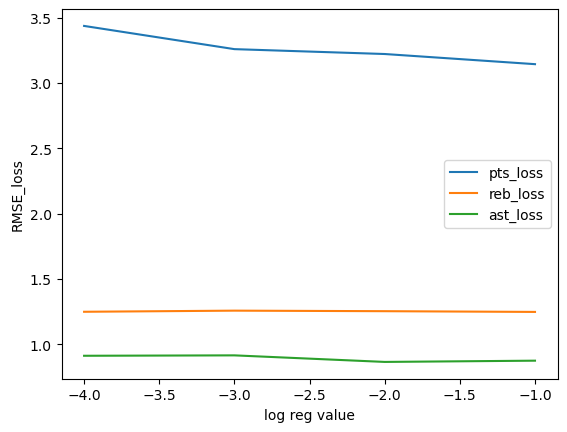

In [34]:
mse_loss_val = np.array(mse_loss_val)
print('cross validation mean:')
print(np.mean(mse_loss_val, axis=1))
print('cross validation std:')
print(np.std(mse_loss_val, axis=1))

mmse_loss_val = np.mean(mse_loss_val, axis=1)
pts_loss = mmse_loss_val[:,0]
reb_loss = mmse_loss_val[:,1]
ast_loss = mmse_loss_val[:,2]

# x = np.arange(4)
x = np.log10(np.array([0.1, 1e-2, 1e-3, 1e-4]))
plt.plot(x, pts_loss, label='pts_loss')
plt.plot(x, reb_loss, label='reb_loss')
plt.plot(x, ast_loss, label='ast_loss')
plt.ylabel('RMSE_loss')
plt.xlabel('log reg value')
plt.legend()
plt.savefig("reg_coe.png",dpi=300,bbox_inches = 'tight')
plt.show()

### Model Performance

In [12]:
#numpy.ndarray to torch.tensor
# x_pts_train, x_pts_test, y_pts_train, y_pts_test = torch.from_numpy(x_pts_train.astype(np.float32)), torch.from_numpy(x_pts_test.astype(np.float32)), torch.from_numpy(y_pts_train.astype(np.float32)), torch.from_numpy(y_pts_test.astype(np.float32))
# x_reb_train, x_reb_test, y_reb_train, y_reb_test = torch.from_numpy(x_reb_train.astype(np.float32)), torch.from_numpy(x_reb_test.astype(np.float32)), torch.from_numpy(y_reb_train.astype(np.float32)), torch.from_numpy(y_reb_test.astype(np.float32))
# x_ast_train, x_ast_test, y_ast_train, y_ast_test = torch.from_numpy(x_ast_train.astype(np.float32)), torch.from_numpy(x_ast_test.astype(np.float32)), torch.from_numpy(y_ast_train.astype(np.float32)), torch.from_numpy(y_ast_test.astype(np.float32))

train_data_pts = Data.TensorDataset(x_pts_train, y_pts_train)
test_data_pts = Data.TensorDataset(x_pts_test, y_pts_test)
train_data_reb = Data.TensorDataset(x_reb_train, y_reb_train)
test_data_reb = Data.TensorDataset(x_reb_test, y_reb_test)
train_data_ast = Data.TensorDataset(x_ast_train, y_ast_train)
test_data_ast = Data.TensorDataset(x_ast_test, y_ast_test)


train_loader_pts = Data.DataLoader(dataset=train_data_pts, batch_size=64)
test_loader_pts = Data.DataLoader(dataset=test_data_pts, batch_size=64)
train_loader_reb = Data.DataLoader(dataset=train_data_reb, batch_size=64)
test_loader_reb = Data.DataLoader(dataset=test_data_reb, batch_size=64)
train_loader_ast = Data.DataLoader(dataset=train_data_ast, batch_size=64)
test_loader_ast = Data.DataLoader(dataset=test_data_ast, batch_size=64)


MLP_model = MultiPredModelMLP(1000, 1e-2, 1e-3, 1e-2, 0.08, 1e-3, 1e-3)
MLP_model.models_train(train_loader_pts, train_loader_reb, train_loader_ast)
MLP_model.models_test(test_loader_pts, test_loader_reb, test_loader_ast)
prediction = MLP_model.models_predict(test_loader_pts, test_loader_reb, test_loader_ast)

start train pts model
epoch:0,MSE loss:45.898915481567386
epoch:10,MSE loss:8.81253386906215
epoch:20,MSE loss:8.757619762420655
epoch:30,MSE loss:8.701036957332066
epoch:40,MSE loss:8.678367614746094
epoch:50,MSE loss:8.652892344338554
epoch:60,MSE loss:8.585486507415771
epoch:70,MSE loss:8.578942380632673
epoch:80,MSE loss:8.473231479099818
epoch:90,MSE loss:8.48590886252267
epoch:100,MSE loss:8.481936250414167
epoch:110,MSE loss:8.579568931034633
epoch:120,MSE loss:8.440759100232805
epoch:130,MSE loss:8.542099244253976
epoch:140,MSE loss:8.534740134647913
epoch:150,MSE loss:8.473077692304338
epoch:160,MSE loss:8.450351960318429
epoch:170,MSE loss:8.456318541935511
epoch:180,MSE loss:8.387920134408134
epoch:190,MSE loss:8.40690291268485
epoch:200,MSE loss:8.413210010528564
epoch:210,MSE loss:8.461528192247663
epoch:220,MSE loss:8.439797183445522
epoch:230,MSE loss:8.438540213448661
epoch:240,MSE loss:8.440985802241734
epoch:250,MSE loss:8.447715841020857
epoch:260,MSE loss:8.33839432

epoch:160,MSE loss:0.6197960325649806
epoch:170,MSE loss:0.6192055770329067
epoch:180,MSE loss:0.618726943220411
epoch:190,MSE loss:0.6182866786207472
epoch:200,MSE loss:0.6180500728743417
epoch:210,MSE loss:0.6177517243794033
epoch:220,MSE loss:0.6173809630530221
epoch:230,MSE loss:0.617175852400916
epoch:240,MSE loss:0.6169846781662532
epoch:250,MSE loss:0.616507089989526
epoch:260,MSE loss:0.6157894798687527
epoch:270,MSE loss:0.6151365407875606
epoch:280,MSE loss:0.6144594303199223
epoch:290,MSE loss:0.6135770073958806
epoch:300,MSE loss:0.6127250458512987
epoch:310,MSE loss:0.6123488060065678
epoch:320,MSE loss:0.612074339389801
epoch:330,MSE loss:0.6118289010865348
epoch:340,MSE loss:0.6116554021835328
epoch:350,MSE loss:0.6114881149360112
epoch:360,MSE loss:0.6113540061882564
epoch:370,MSE loss:0.6112524083682469
epoch:380,MSE loss:0.6111449888774327
epoch:390,MSE loss:0.6109485226018089
epoch:400,MSE loss:0.6107419618538448
epoch:410,MSE loss:0.6104155940668924
epoch:420,MSE lo

In [11]:
y_pts_test.shape

torch.Size([561])

In [ ]:
y_pts_test.numpy()
y_reb_test.numpy()
y_ast_test.numpy()

In [14]:
prediction[:10]

array([[ 4.44422817,  2.43617201,  1.34128046],
       [ 8.78707409,  3.70740795,  1.16542029],
       [ 7.28976154,  3.10401988,  2.40516496],
       [ 5.51750231,  2.90750861,  0.34948093],
       [15.94303513,  4.31861401,  1.37457657],
       [ 4.58543158,  3.7953577 ,  0.92550057],
       [ 6.14465618,  5.23685789,  1.29394603],
       [ 8.40432167,  3.5573101 ,  3.40540624],
       [ 3.61030579,  2.72355318,  0.84838635],
       [ 2.25703335,  2.61185455,  0.50730377]])

In [15]:
y_pts_test[:10]

tensor([ 7.5000,  8.7000,  7.3000,  5.3000, 14.2000,  5.9000,  8.9000,  2.9000,
         4.7000,  1.8000])